In [12]:
from tensorflow.keras.datasets import mnist

#this will be the data for the MNIST test
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [13]:
#reshaping data
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000,28, 28, 1))

#normalize data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [14]:
from tensorflow.keras.utils import to_categorical

#one-hot encodes y values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

cnn = Sequential()

#adds first convolution layer
cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

#adds second convolution layer
cnn.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

#flattens results
cnn.add(Flatten())

#adds a dense layer
cnn.add(Dense(units=128, activation='relu'))

#adds another dense layer for final ouput
cnn.add(Dense(units=10, activation='softmax'))

cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               409728    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

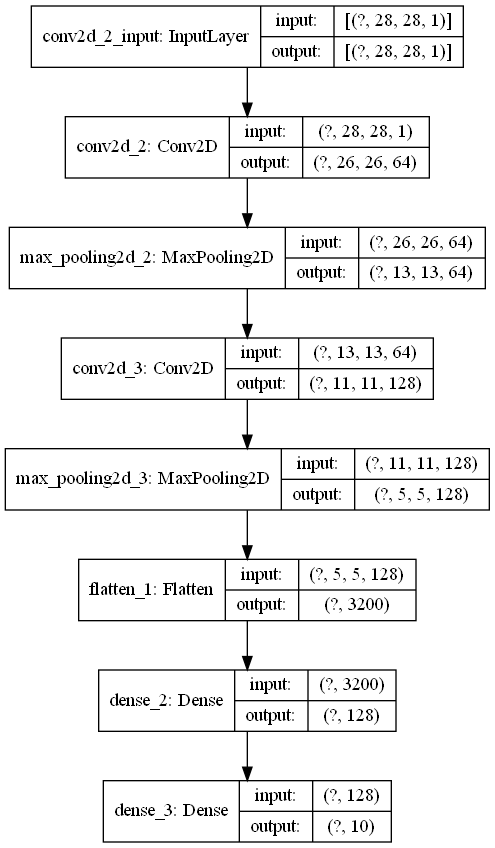

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(cnn, to_file='out/convnet.png', show_shapes=True, show_layer_names=True)
Image(filename='out/convnet.png')

In [17]:
import time

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

startTime = time.time()
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
endTime = time.time()

mnistTimeToComplete = endTime - startTime

Epoch 1/5
844/844 [==============================] - 18s 21ms/step - loss: 0.1430 - accuracy: 0.9563 - val_loss: 0.0555 - val_accuracy: 0.9835
Epoch 2/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0435 - accuracy: 0.9863 - val_loss: 0.0390 - val_accuracy: 0.9892
Epoch 3/5
844/844 [==============================] - 18s 22ms/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0354 - val_accuracy: 0.9900
Epoch 4/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0221 - accuracy: 0.9930 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 5/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0344 - val_accuracy: 0.9910


In [18]:
loss, accuracy = cnn.evaluate(X_test, y_test)

#loss and accuracy for mnist test
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0288 - accuracy: 0.9908
loss: 0.028781164437532425
accuracy: 0.9908000230789185


In [19]:
from tensorflow.keras.datasets import fashion_mnist

#this will be the data for the fashion_mnist test
(X_fashion_train, y_fashion_train), (X_fashion_test, y_fashion_test) = mnist.load_data()

print(X_fashion_train.shape)
print(X_fashion_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [20]:
#reshaping data
X_fashion_train = X_fashion_train.reshape((60000, 28, 28, 1))
X_fashion_test = X_fashion_test.reshape((10000,28, 28, 1))

#normalize data
X_fashion_train = X_fashion_train.astype('float32') / 255
X_fashion_test = X_fashion_test.astype('float32') / 255

#one-hot encodes y values
y_fashion_train = to_categorical(y_fashion_train)
y_fashion_test = to_categorical(y_fashion_test)



In [21]:


#train data and time how long it takes to complete
start = time.time()
cnn.fit(X_fashion_train, y_fashion_train, epochs=5, batch_size=64, validation_split=0.1)
stop = time.time()

fashionMnistTimeToComplete = stop - start

Epoch 1/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0542 - val_accuracy: 0.9880
Epoch 2/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0400 - val_accuracy: 0.9917
Epoch 3/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.0378 - val_accuracy: 0.9923
Epoch 4/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.0469 - val_accuracy: 0.9920
Epoch 5/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0445 - val_accuracy: 0.9917


In [22]:
loss, accuracy = cnn.evaluate(X_fashion_test, y_fashion_test)

#loss and accuracy for fashion_mnist test
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9916
loss: 0.03217339143157005
accuracy: 0.991599977016449


In [23]:
print(f'MNIST Training Time: {mnistTimeToComplete:>20}')
print(f'Fashion MNIST Training Time: {fashionMnistTimeToComplete:>20}')

MNIST Training Time:    91.34445476531982
Fashion MNIST Training Time:    88.76022171974182


<h1>Results for MNIST vs Fashion MNIST</h1>
<p>After running both tests, the accuracy and loss were very similar.</p>
<p>For MNIST: (loss: 0.0336468368768692,  accuracy: 0.9894000291824341)</p>
<p>For Fashion MNIST: (loss: 0.03285454213619232, accuracy: 0.991100013256073)</p>
<br/>
<p>The training time also took very similar amounts of time.</p>
<p>MNIST: 91.34445476531982</p>
<p>Fashion MNIST: 88.76022171974182</p>
<br/>
<p>The results are very similar because the datasets are very similar</p>